In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc 
import scanpy.external as sce

# Description 

This notebook is used to perform the basic scRNA-seq Analysis for the ZWS hippocampus. 

## Load data, QC 

the 4 samples can be divided into 2 groups. N(active group), n1, n2 and R(rest group), r1, r2

In [3]:
n1 = sc.read_10x_h5('nee_1_counts.h5')
n1.var_names_make_unique()
n1.obs.loc[:,'samples'] = 'n1'
n1.obs.loc[:,'state'] = 'n'

n2 = sc.read_10x_h5('nee_2_counts.h5') 
n2.var_names_make_unique()
n2.obs.loc[:,'samples'] = 'n2'
n2.obs.loc[:,'state'] = 'n'

r1 = sc.read_10x_h5('r1_counts.h5')
r1.var_names_make_unique()
r1.obs.loc[:,'samples'] = 'r1'
r1.obs.loc[:,'state'] = 'r'

r2 = sc.read_10x_h5('r2_counts.h5')
r2.var_names_make_unique()
r2.obs.loc[:,'samples'] = 'r2'
r2.obs.loc[:,'state'] = 'r'

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_na

In [5]:
import anndata as ad 

scdata = ad.concat([n1,n2,r1,r2])
scdata.var = n1.var.copy()
print(scdata.shape)

(42430, 23848)


d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
r1_id = 'r1_' + r1.obs.index.values 
r2_id = 'r2_' + r2.obs.index.values 
n1_id = 'n1_' + n1.obs.index.values
n2_id = 'n2_' + n2.obs.index.values 

new_idx = np.concatenate([n1_id, n2_id, r1_id, r2_id])
scdata.obs.index = new_idx

(42430, 23848)
(42430, 18138)


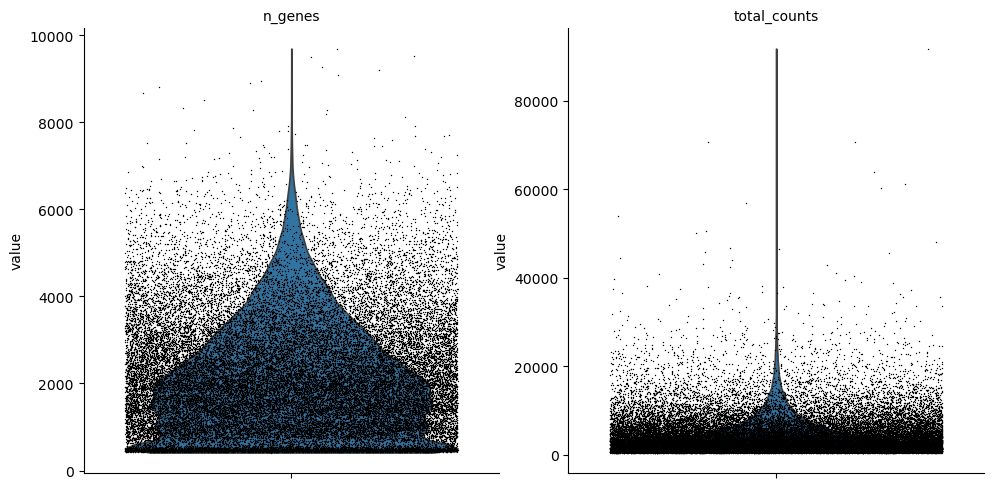

In [7]:
sc.pp.filter_cells(scdata, min_genes = 200)
print(scdata.shape)
sc.pp.filter_genes(scdata, min_cells = 20) 
print(scdata.shape)


sc.pp.calculate_qc_metrics(scdata, inplace = True)
sc.pl.violin(scdata, ['n_genes', 'total_counts'], jitter = 0.4, multi_panel = True)

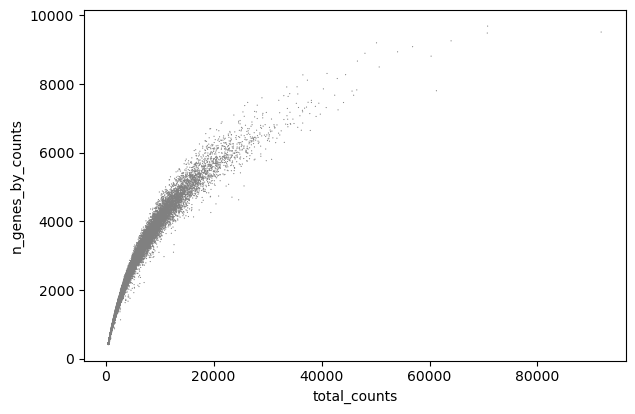

In [8]:
sc.pl.scatter(scdata, x="total_counts", y="n_genes_by_counts")

(42430, 18138)
(42414, 18138)


C:\Users\sunrui\AppData\Local\Temp\ipykernel_13636\3774766543.py:5: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  scdata.layers['counts'] = scdata.X
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


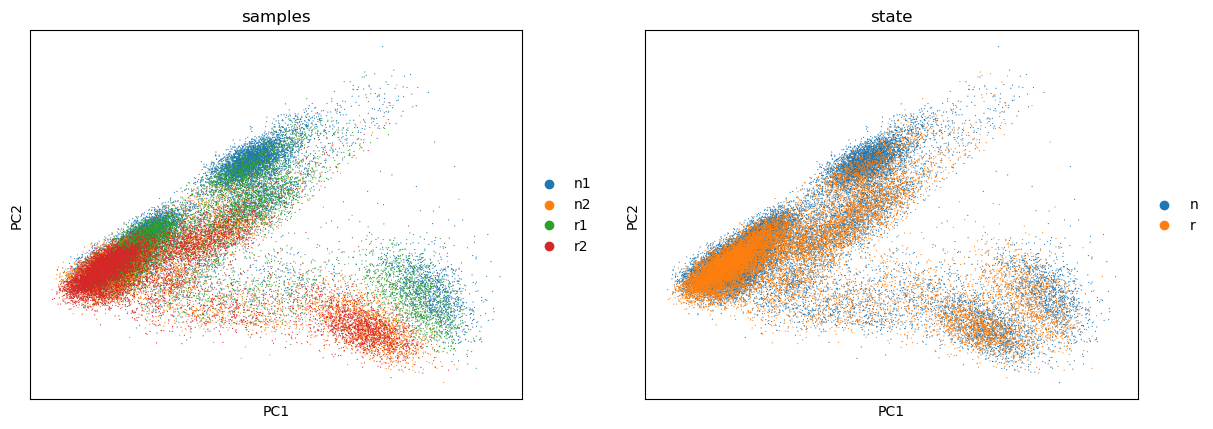

In [9]:
print(scdata.shape)
scdata = scdata[scdata.obs.n_genes_by_counts < 8000]
print(scdata.shape) 

scdata.layers['counts'] = scdata.X 
sc.pp.normalize_total(scdata, target_sum=1e4) 
sc.pp.log1p(scdata)
scdata.raw = scdata 

sc.pp.highly_variable_genes(scdata, n_top_genes=3000)
scdata = scdata[:, scdata.var.highly_variable] 

sc.tl.pca(scdata)
sc.pl.pca(scdata, color = ['samples','state'])

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


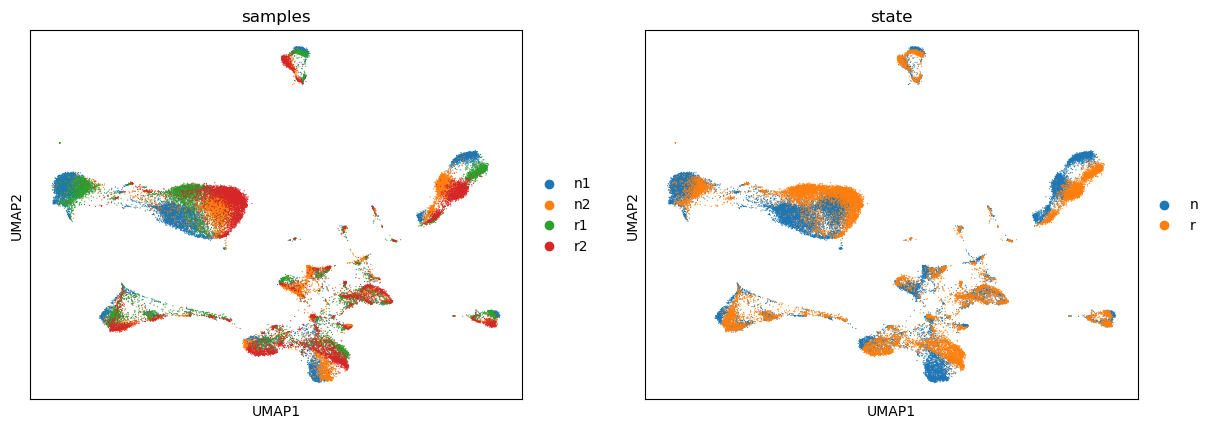

In [10]:
sc.pp.neighbors(scdata)
sc.tl.umap(scdata, min_dist = 0.2)
sc.pl.umap(scdata, color = ['samples','state'])

C:\Users\sunrui\AppData\Local\Temp\ipykernel_13636\2808183401.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(scdata, resolution=0.2)


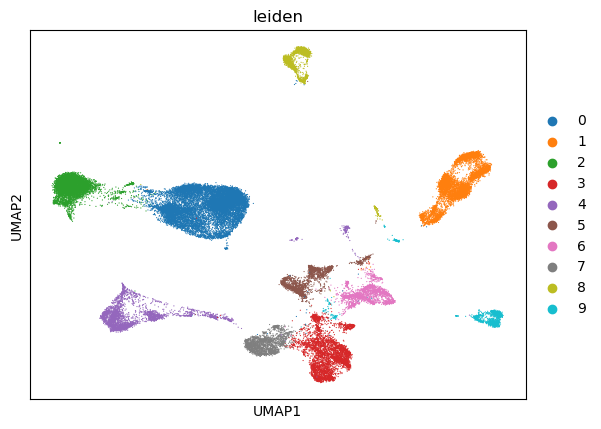

In [12]:
sc.tl.leiden(scdata, resolution=0.2)
sc.pl.umap(scdata, color = 'leiden')

In [13]:
scdata.write_h5ad('scdata.h5ad')

## Harmony integration and Cell type annotation

2025-04-11 15:19:14,682 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-04-11 15:19:20,108 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-04-11 15:19:20,435 - harmonypy - INFO - Iteration 1 of 20
2025-04-11 15:19:39,902 - harmonypy - INFO - Iteration 2 of 20
2025-04-11 15:19:58,204 - harmonypy - INFO - Iteration 3 of 20
2025-04-11 15:20:15,993 - harmonypy - INFO - Converged after 3 iterations


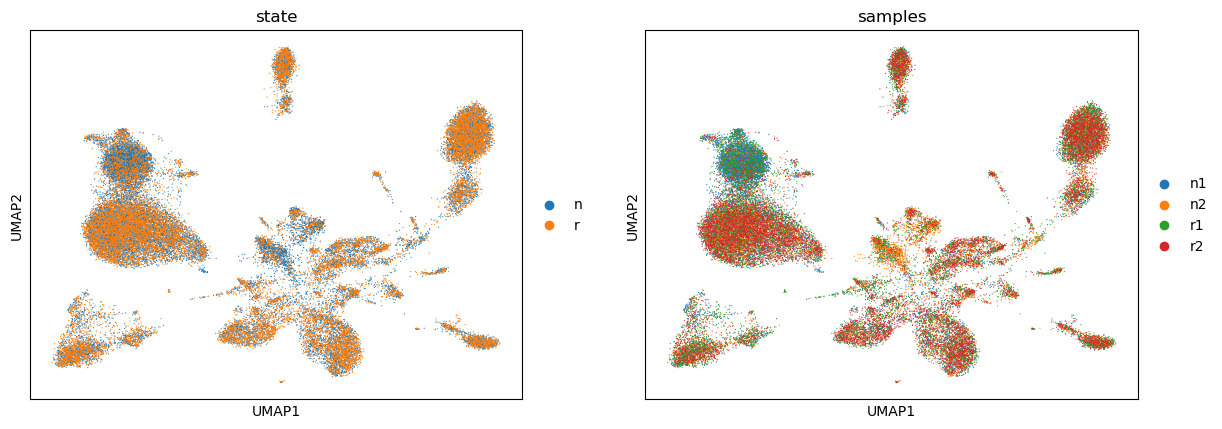

In [40]:
#scdata = sc.read_h5ad('scdata.h5ad')
sce.pp.harmony_integrate(scdata, 
                         key = ['samples'],
                         max_iter_harmony = 20, 
                         sigma = 0.1, 
                         random_state = 0,
                         theta =1)

sc.pp.neighbors(scdata, use_rep = 'X_pca_harmony')
sc.tl.umap(scdata)
sc.pl.umap(scdata, color = ['state', 'samples'])

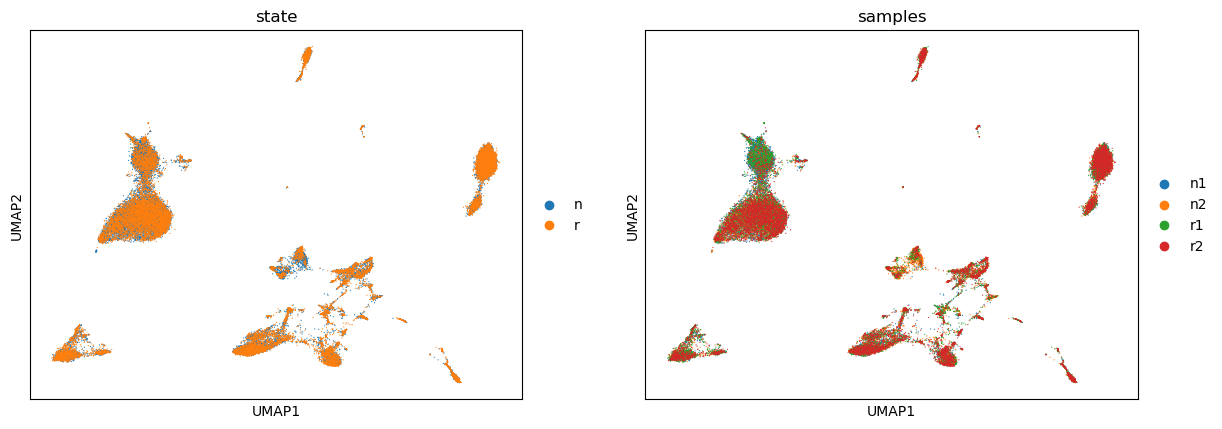

In [41]:
sc.tl.umap(scdata, min_dist = 0.1)
sc.pl.umap(scdata, color = ['state', 'samples'])

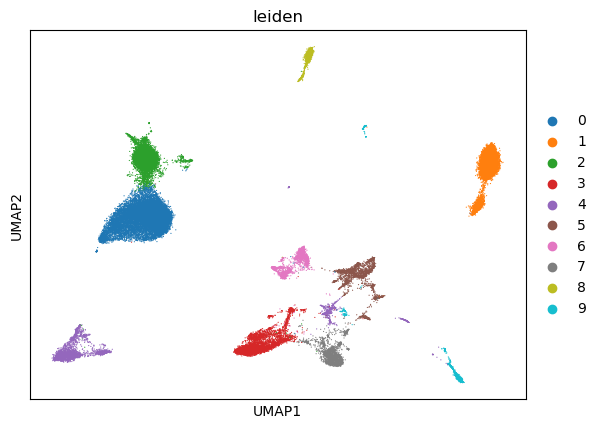

In [42]:
sc.tl.leiden(scdata, resolution = 0.2)
sc.pl.umap(scdata, color = ['leiden'])

### Drop out some outliers

In [ ]:
umap = scdata.obsm['X_umap']
x,y = umap[:,0], umap[:,1] 


from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

labels = scdata.obs.leiden.values.astype(str)

# 自动生成颜色映射
unique_labels = sorted(set(labels))  # 获取唯一标签并排序
num_labels = len(unique_labels)
cmap = plt.cm.get_cmap('tab20')  # 使用 'tab20' 颜色映射（适合区分多个类别）
normalize = Normalize(vmin=0, vmax=num_labels - 1)  # 归一化到 [0, num_labels-1]

# 将标签映射到颜色
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}  # 标签到索引的映射
color_indices = [label_to_index[label] for label in labels]  # 每个点对应的索引
colors = cmap(normalize(color_indices))  # 根据索引获取颜色

# # 绘制散点图
# plt.scatter(x, y, c=colors, s = 0.1)
# # 添加
drop_idx_1 = np.logical_and(labels == '4' , y > 0)
print(drop_idx_1.sum()) 

drop_idx_2 = np.logical_and(labels == '9' , y > 5)
print(drop_idx_2.sum())

modify_idx_1 = np.logical_and(labels == '4' , np.abs(x-5)< 1)
print(modify_idx_1.sum())

modify_idx_2 = np.logical_and(labels == '9' , np.abs(x-5) < 2)
print(modify_idx_2.sum())

modify_idx_3 = np.logical_and(labels == '4' , np.abs(x-10) < 4)
print(modify_idx_3.sum()) 

scdata.obs.loc[:,'new_leiden'] = scdata.obs.loc[:,'leiden'].values.astype(str)
scdata.obs.loc[:,'new_leiden'][modify_idx_1] = '10'
scdata.obs.loc[:,'new_leiden'][modify_idx_2] = '10' 
scdata.obs.loc[:,'new_leiden'][modify_idx_3] = '11' 

drop_idx = np.logical_or(drop_idx_1, drop_idx_2)

scdata = scdata[~drop_idx,:]

sc.pl.umap(scdata, color = 'new_leiden')

In [ ]:
#scdata.write_h5ad('scdata_filter.h5ad')

### annotate using cell markers

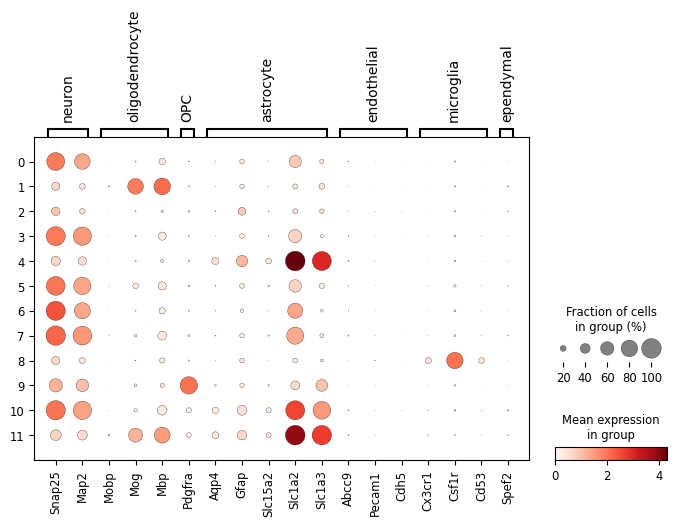

In [45]:
#scdata.obs.leiden = scdata.obs.leiden_R.values.astype(str)
ori_marker_dic = {
    'neuron': ['Snap25','Map2'],
    #'excitatory neuron': ['Arpp21','Slc17a7','Vglut1', 'Vglut2','Tbr1','Neun','Foxa2'],
    #'excitatory neuron': ['Slc17a7'],
    #'inhibitory neuron': ['Gad1','Gad2'],
    'oligodendrocyte': ['Mobp','Mog','Mbp'],
    'OPC': ['Pdgfra'],
    'astrocyte': ['Aqp4', 'Gfap', 'Slc15a2','Slc1a2','Slc1a3'],
    'endothelial': ['Abcc9', 'Pecam1', 'Cdh5'],
    'microglia': ['Cx3cr1','Csf1r','Cd53'],
    'ependymal': ['Spef2']
}

sc.pl.dotplot(scdata, var_names = ori_marker_dic, groupby= 'new_leiden')

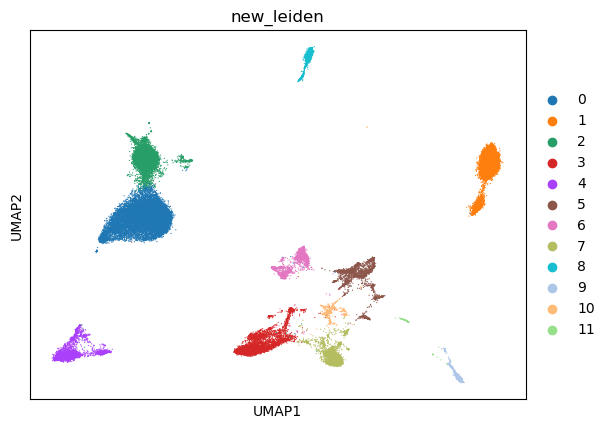

In [46]:

sc.pl.umap(scdata, color = ['new_leiden'])

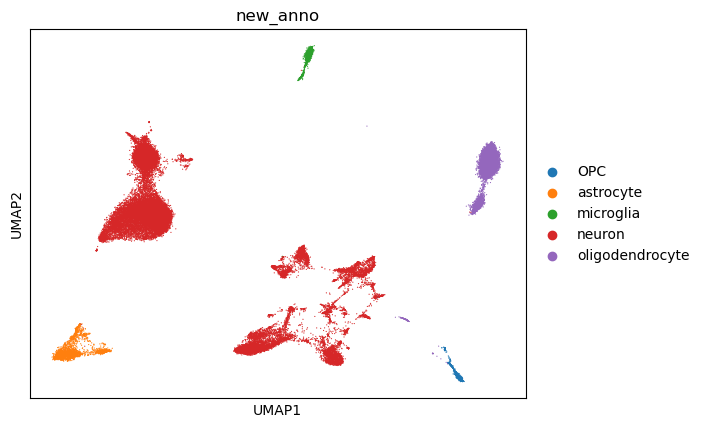

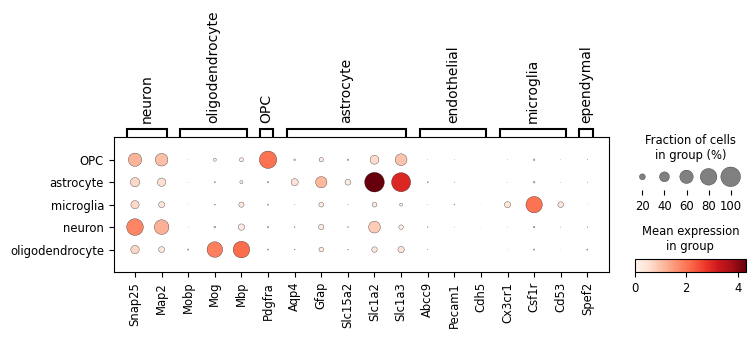

In [49]:
anno_dic = {
    '0': 'neuron',
    '1': 'oligodendrocyte',
    '2': 'neuron',
    '3': 'neuron',
    '4': 'astrocyte',
    '5': 'neuron',
    '6': 'neuron',
    '7': 'neuron',
    '8': 'microglia',
    '9': 'OPC',
    '10': 'neuron',
    '11': 'oligodendrocyte'
}

scdata.obs.loc[:,'new_anno'] = scdata.obs.new_leiden.map(anno_dic)
sc.pl.umap(scdata, color='new_anno')
sc.pl.dotplot(scdata, var_names = ori_marker_dic, groupby= 'new_anno')

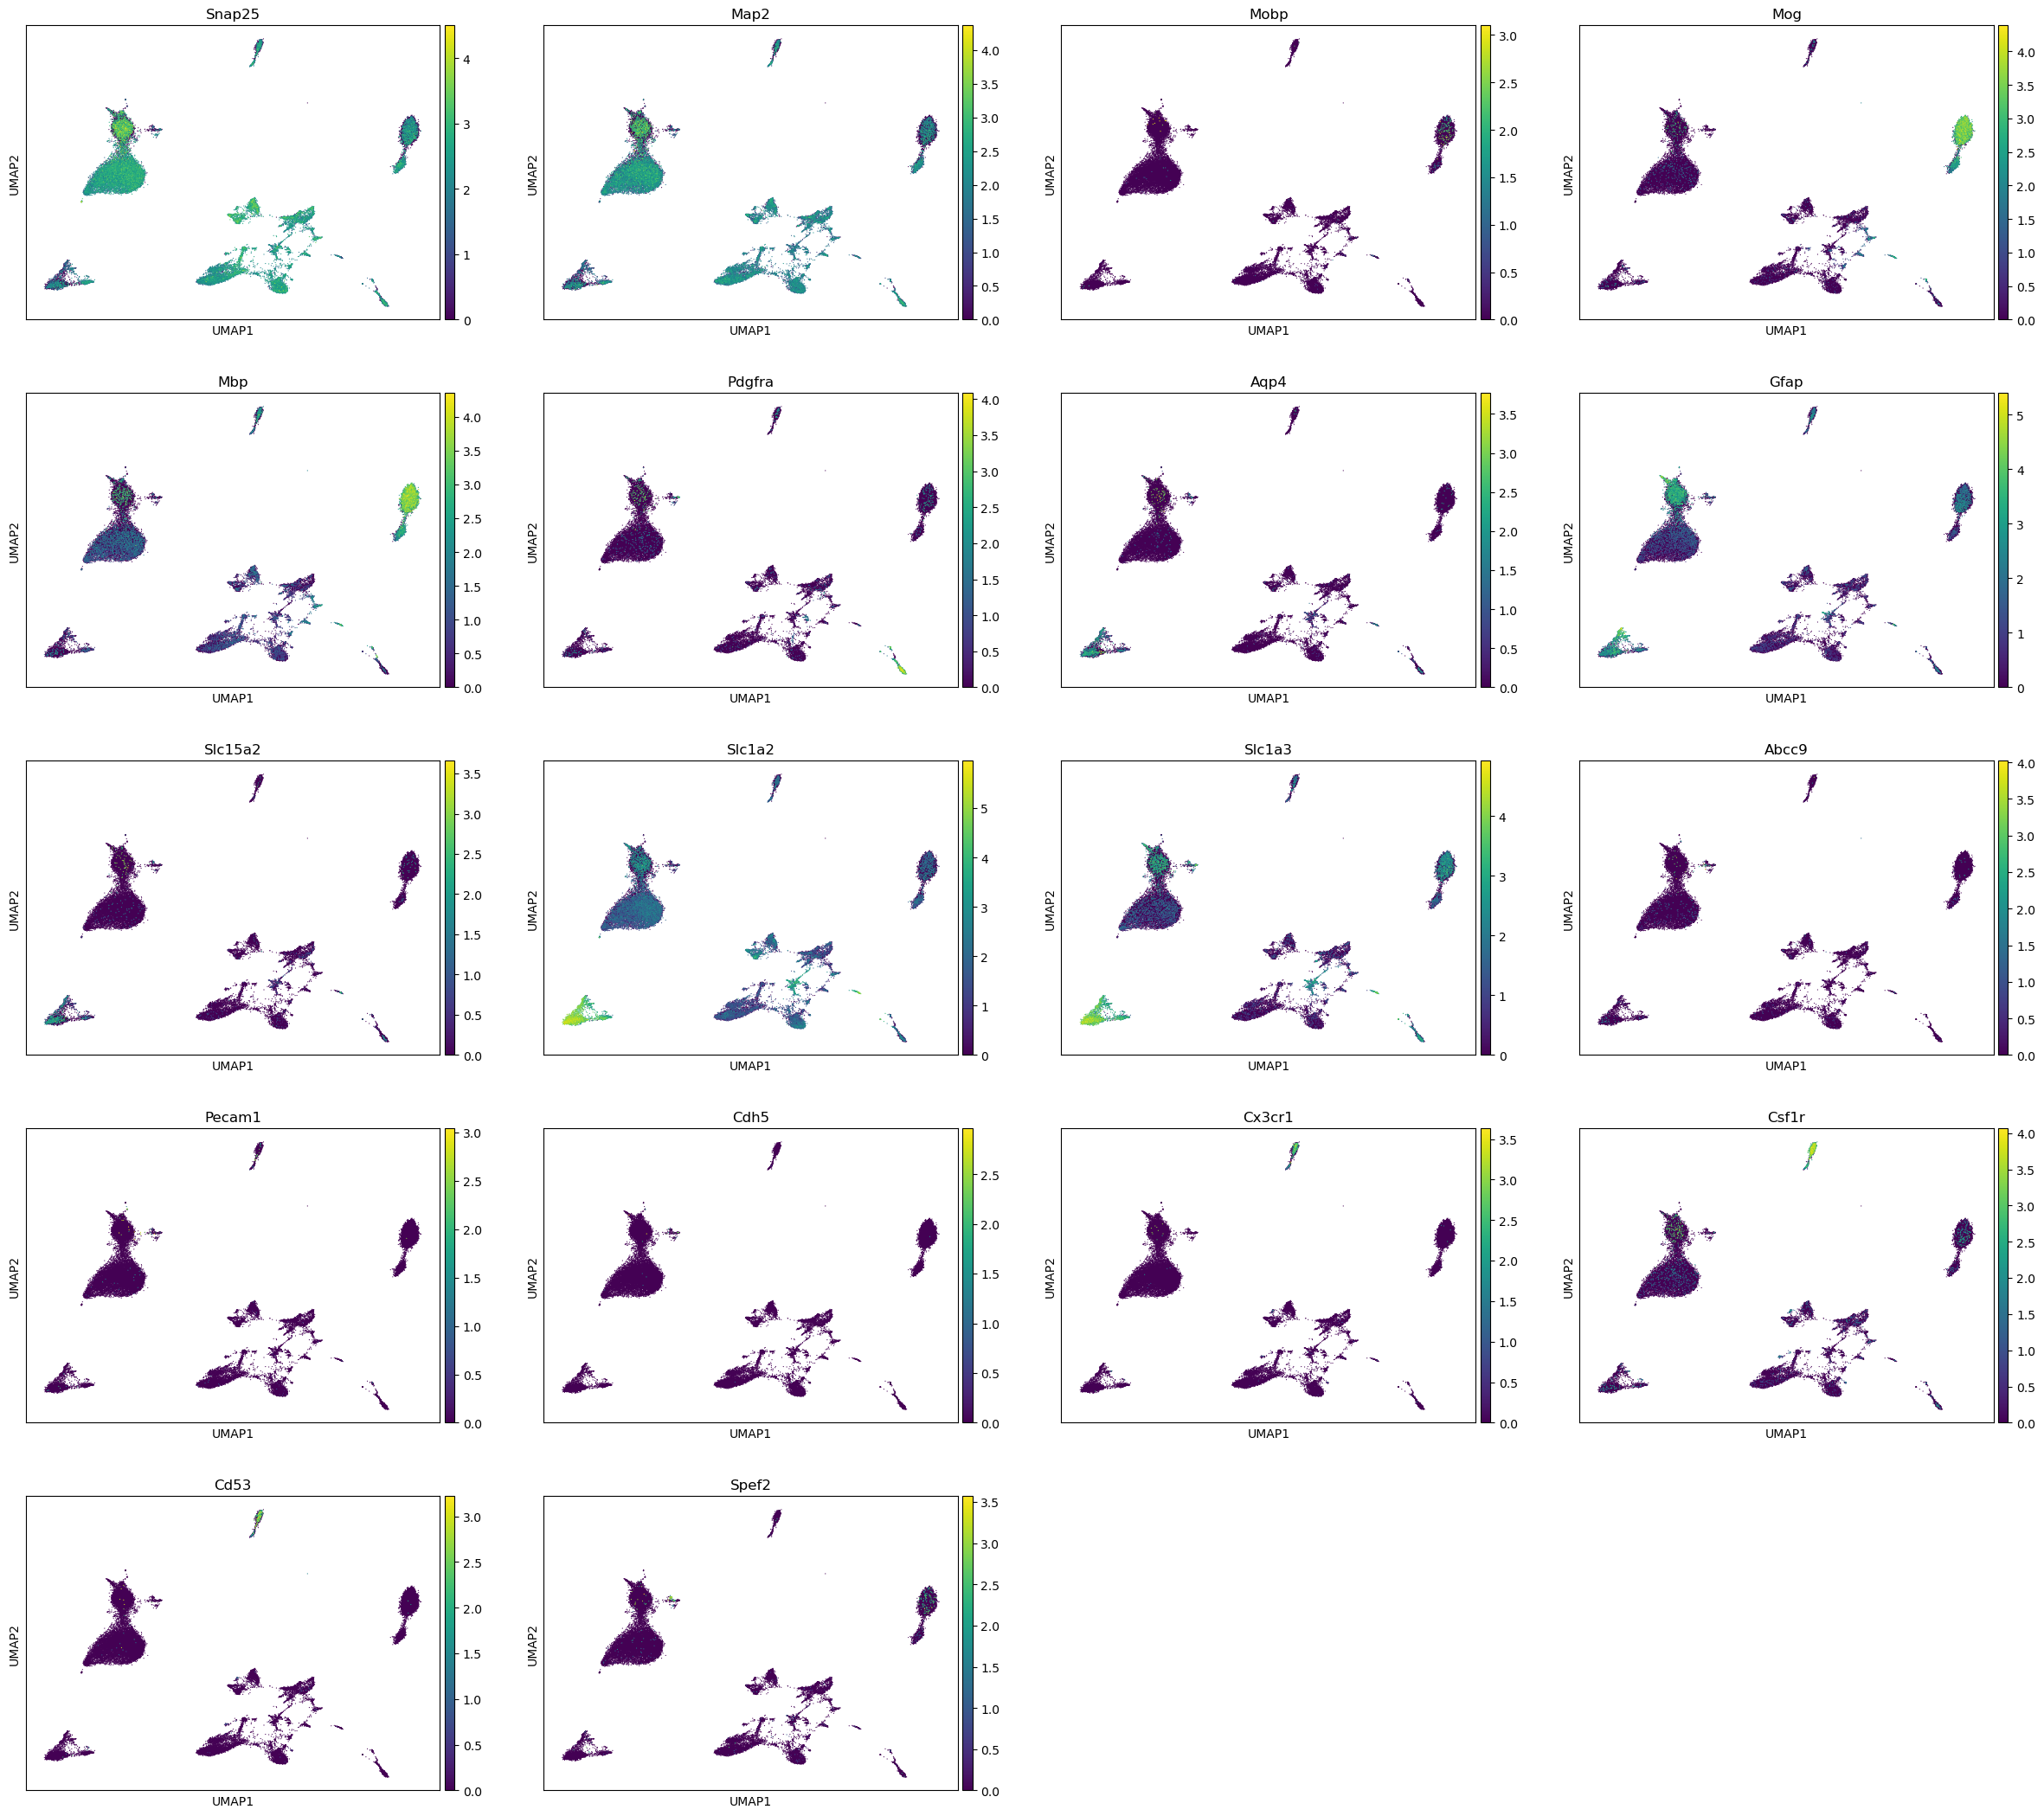

In [47]:
genes = []
for key in ori_marker_dic:
    genes += ori_marker_dic[key] #list(ori_marker_dic.values())
sc.pl.umap(scdata, color = genes)


In [ ]:
#scdata.write_h5ad('scdata_filter.h5ad')

### fine annotation of neuron 

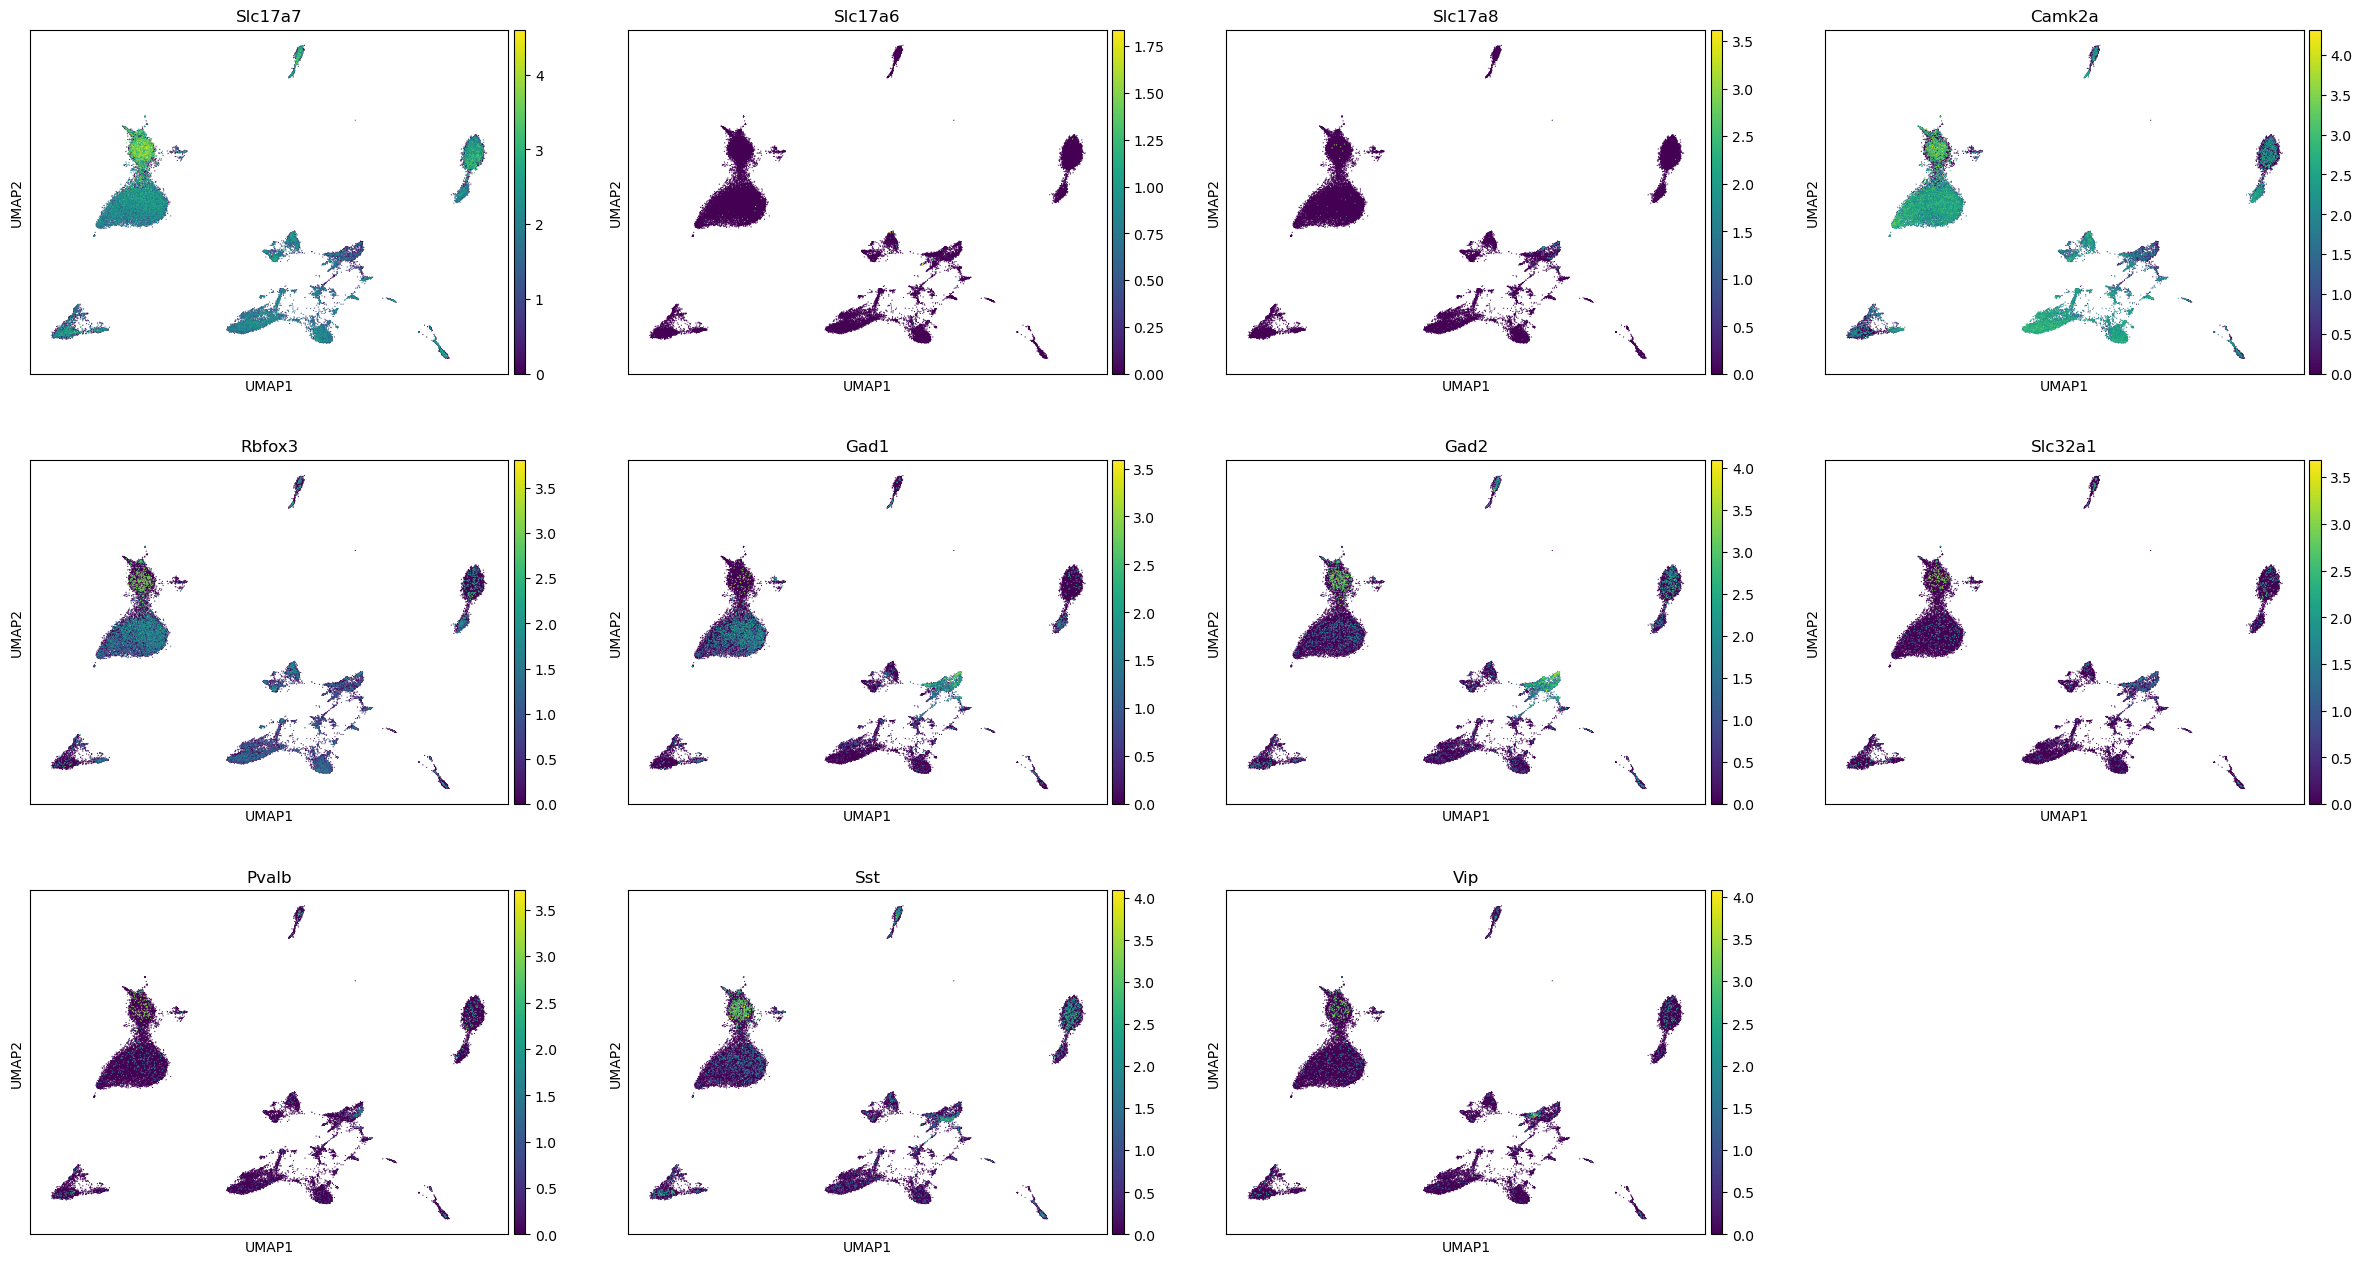

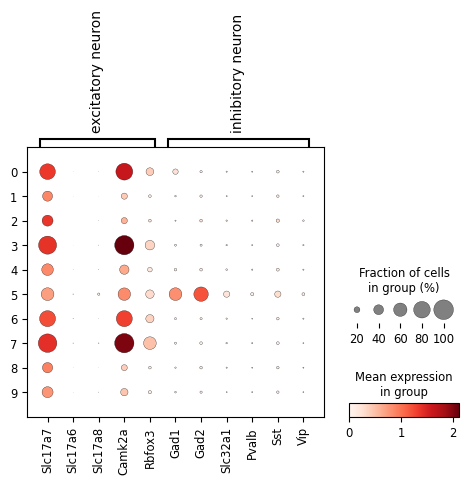

In [57]:
excitatory_markers = ['Slc17a7', 'Slc17a6', 'Slc17a8', 'Camk2a', 'Rbfox3','Vglut1', 'Vglut2']#,'Slc6a5','Slc6a9']
inhibitory_markers = ['Gad1', 'Gad2', 'Slc32a1', 'Pvalb', 'Sst', 'Vip']


neuron_dic = {'excitatory neuron': excitatory_markers,
              'inhibitory neuron': inhibitory_markers}

neu_marker_dic = {}
for key in neuron_dic:
    tmp = []
    for ele in neuron_dic[key]:
        if ele in scdata.raw.var.index.values:
            tmp.append(ele)
    if len(tmp) >= 1:
        neu_marker_dic[key] = tmp


neu_genes = ['Slc17a7', 'Slc17a6', 'Slc17a8', 'Camk2a', 'Rbfox3','Gad1', 'Gad2', 'Slc32a1', 'Pvalb', 'Sst', 'Vip']

sc.pl.umap(scdata, color = neu_genes)
sc.pl.dotplot(scdata, var_names = neu_marker_dic,groupby = 'leiden',use_raw = True, cmap = 'Reds')

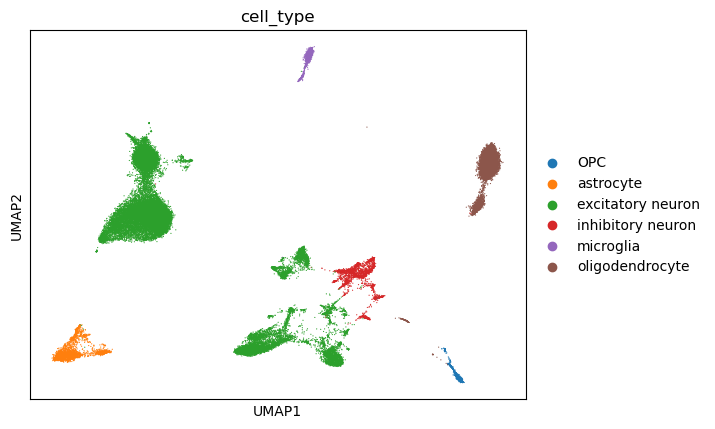

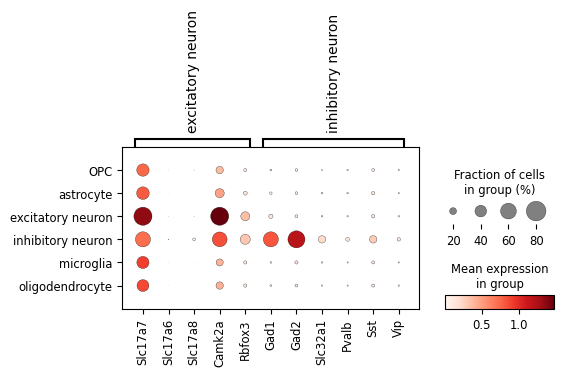

In [60]:
anno_dic = {
    '0': 'excitatory neuron',
    '1': 'oligodendrocyte',
    '2': 'excitatory neuron',
    '3': 'excitatory neuron',
    '4': 'astrocyte',
    '5': 'inhibitory neuron',
    '6': 'excitatory neuron',
    '7': 'excitatory neuron',
    '8': 'microglia',
    '9': 'OPC',
    '10': 'excitatory neuron',
    '11': 'oligodendrocyte'
}

scdata.obs.loc[:,'cell_type'] = scdata.obs.new_leiden.map(anno_dic)
sc.pl.umap(scdata, color='cell_type')
sc.pl.dotplot(scdata, var_names = neu_marker_dic, groupby= 'cell_type')

In [61]:
scdata.write_h5ad('scdata_filter.h5ad')

### save the excitatory neuron only 

In [102]:
scdata = sc.read_h5ad('scdata_filter.h5ad')
scdata = scdata[scdata.obs.cell_type == 'excitatory neuron']
print(scdata.shape) 

(27320, 3000)


In [103]:
#scdata.write_h5ad('excitatory_neuron.h5ad') 

#new_obs = scdata.obs.copy()

n1 = sc.read_10x_h5('nee_1_counts.h5')
n1.var_names_make_unique()
n1.obs.loc[:,'samples'] = 'n1'
n1.obs.loc[:,'state'] = 'n'

n2 = sc.read_10x_h5('nee_2_counts.h5') 
n2.var_names_make_unique()
n2.obs.loc[:,'samples'] = 'n2'
n2.obs.loc[:,'state'] = 'n'

r1 = sc.read_10x_h5('r1_counts.h5')
r1.var_names_make_unique()
r1.obs.loc[:,'samples'] = 'r1'
r1.obs.loc[:,'state'] = 'r'

r2 = sc.read_10x_h5('r2_counts.h5')
r2.var_names_make_unique()
r2.obs.loc[:,'samples'] = 'r2'
r2.obs.loc[:,'state'] = 'r' 

import anndata as ad 

adata = ad.concat([n1,n2,r1,r2])
adata.var = n1.var.copy()
print(adata.shape) 

r1_id = 'r1_' + r1.obs.index.values 
r2_id = 'r2_' + r2.obs.index.values 
n1_id = 'n1_' + n1.obs.index.values
n2_id = 'n2_' + n2.obs.index.values 

new_idx = np.concatenate([n1_id, n2_id, r1_id, r2_id])
adata.obs.index = new_idx 

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_na

(42430, 23848)


In [106]:
mutual_idx = np.intersect1d(scdata.obs.index, adata.obs.index)
print(mutual_idx.shape) 

adata = adata[mutual_idx,:]
scdata = scdata[mutual_idx,:]

#scdata.X = adata.X 

new_scdata = ad.AnnData(X = adata.X, obs = scdata.obs, var = adata.var, obsm = scdata.obsm)

(27320,)


In [108]:
new_scdata.write_h5ad('ex_neuron.h5ad')